In [34]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import pandas as pd
import datetime
import talib

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Warning ignore
import warnings
warnings.filterwarnings('ignore')

In [35]:
# Get data
msft =yf.download('MSFT', start='2022-01-01', end='2023-10-14')
msft.reset_index(inplace=True)
msft.set_index('Date', inplace=True)
msft.drop('Close', axis=1,  inplace=True)
msft.rename(columns={'Adj Close': 'Close'},inplace=True)

# Se define el dataframe para los datos del modelo de reinforcment learning 
data_model = pd.DataFrame(data=msft.reset_index()['Date'], columns=['Date'])
data_model.set_index('Date', inplace=True)

[*********************100%***********************]  1 of 1 completed


In [36]:
msft

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,335.350006,338.000000,329.779999,329.394867,28865100
2022-01-04,334.829987,335.200012,326.119995,323.746704,32674300
2022-01-05,325.859985,326.070007,315.980011,311.318787,40054300
2022-01-06,313.149994,318.700012,311.489990,308.858704,39646100
2022-01-07,314.149994,316.500000,310.089996,309.016144,32720000
...,...,...,...,...,...
2023-10-09,324.750000,330.299988,323.179993,329.820007,19891200
2023-10-10,330.959991,331.100006,327.670013,328.390015,20557100
2023-10-11,331.209991,332.820007,329.140015,332.420013,20063200


In [37]:
function_groups = ['Overlap Studies',
                   'Momentum Indicators',
                   'Volume Indicators',
                   'Volatility Indicators',
                   'Price Transform',
                   'Cycle Indicators',
                   'Pattern Recognition',
                   'Statistic Functions',
                   'Math Transform',
                   'Math Operators']

In [4]:
talib_grps = talib.get_function_groups()

## INDICADORES

Simple moving avergae

In [5]:
sma = msft.loc[:, ['Close']]

In [6]:
for t in [5, 21, 63]:
    sma[f'SMA_{t}'] = talib.SMA(sma.Close,
                               timeperiod=t)

Text(0.5, 0, '')

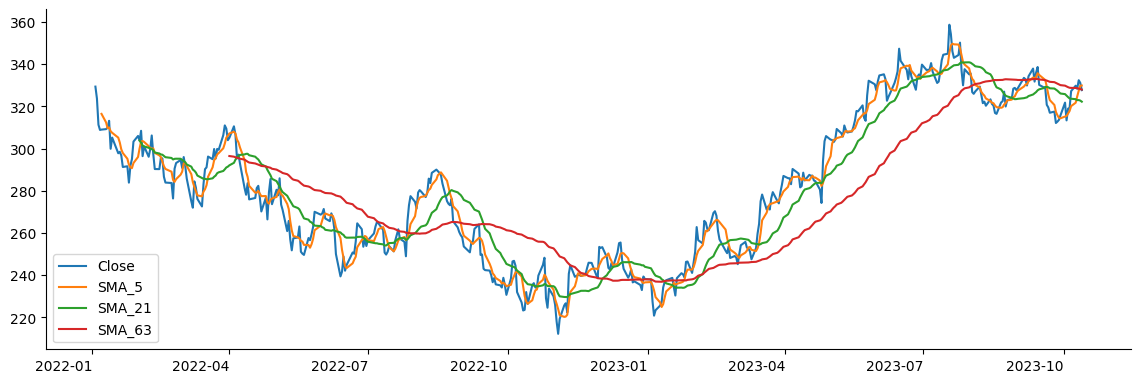

In [7]:
ax = sma.plot(figsize=(14, 5), rot=0)
sns.despine()
ax.set_xlabel('')

Exponential Moving Average (EMA)

In [8]:
ema = msft.loc[:, ['Close']]

In [9]:
for t in [5, 21, 63]:
    ema[f'EMA_{t}'] = talib.EMA(ema.Close,
                               timeperiod=t)

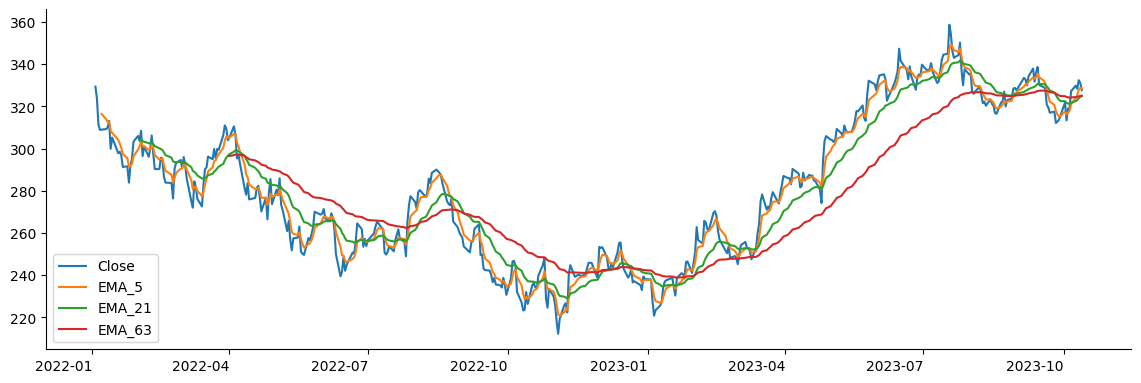

In [10]:
ax = ema.plot(figsize=(14, 5), rot=0)
sns.despine()
ax.set_xlabel('');

Weighted Moving Average (WMA)

In [11]:
wma = msft.loc[:, ['Close']]

In [12]:
for t in [5, 21, 63]:
    wma[f'WMA_{t}'] = talib.WMA(wma.Close,
                               timeperiod=t)

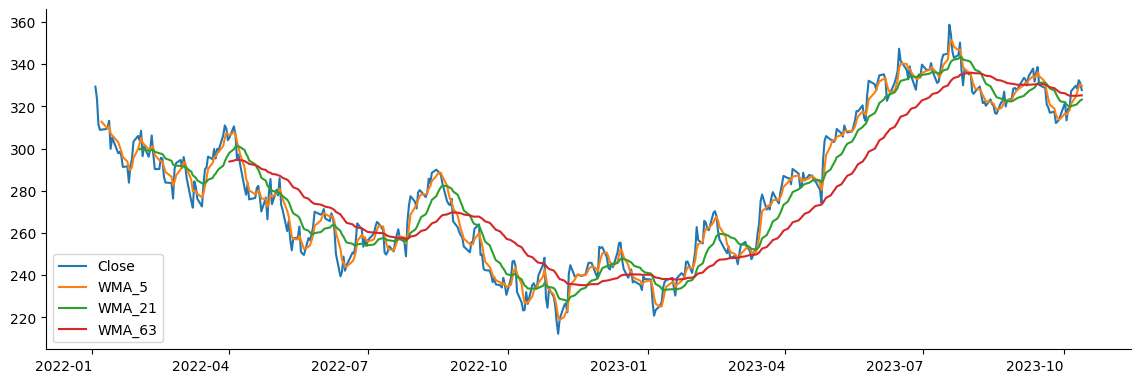

In [13]:
ax = wma.plot(figsize=(14, 5), rot=0)
sns.despine()
ax.set_xlabel('');

## Overlap Studies

Boolinger Bands

In [14]:
s = talib.BBANDS(msft.Close,   # Number of periods (2 to 100000)
                 timeperiod=20,
                 nbdevup=2,    # Deviation multiplier for lower band
                 nbdevdn=2,    # Deviation multiplier for upper band
                 matype=1      # default: SMA
                 )

In [15]:
bb_bands = ['upper', 'middle', 'lower']

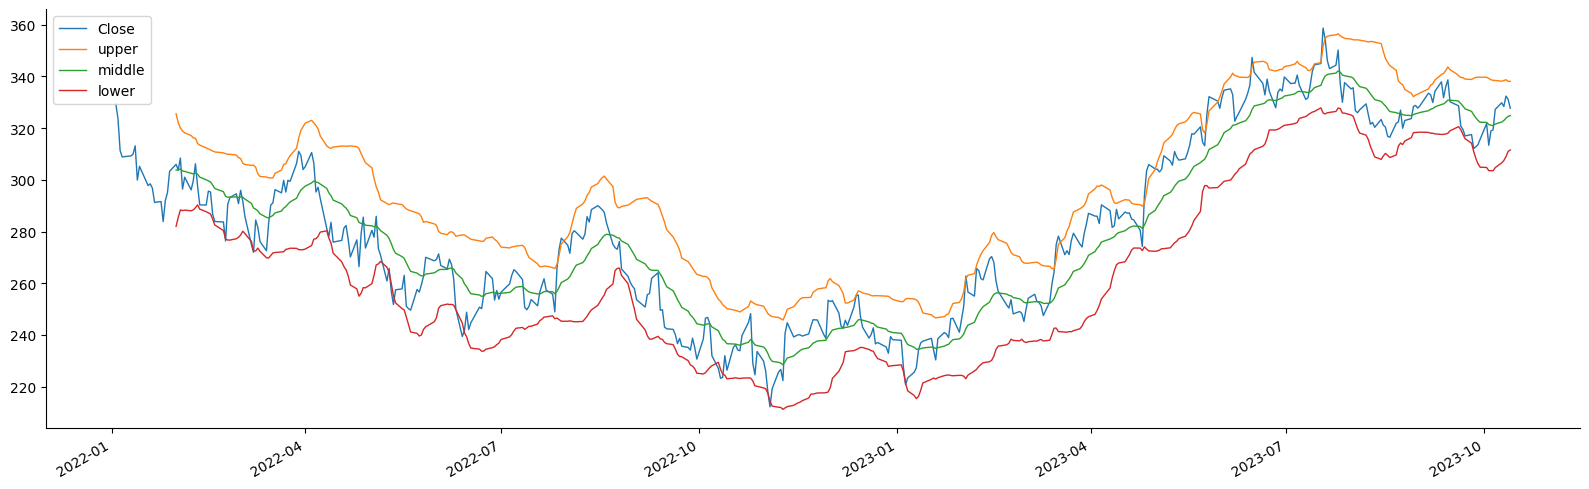

In [16]:
df = msft.loc[:, ['Close']]
df = df.assign(**dict(zip(bb_bands, s)))
ax = df.loc[:, ['Close'] + bb_bands].plot(figsize=(16, 5), lw=1)

ax.set_xlabel('')
sns.despine()
plt.tight_layout();

Parabolic SAR

In [17]:
sar = msft.loc[:,['Close', 'High', 'Low']]
sar['SAR'] = talib.SAR(sar.High, sar.Low, 
                      acceleration=0.02, # common value
                      maximum=0.2)  

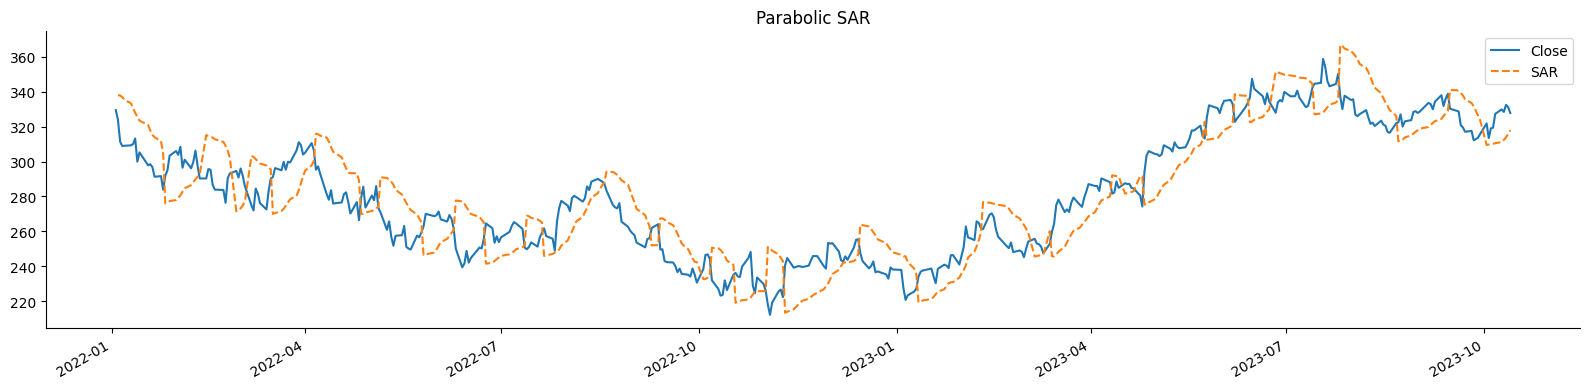

In [18]:
ax = sar[['Close', 'SAR']].plot(figsize=(16, 4), style=['-', '--'], title='Parabolic SAR')
ax.set_xlabel('')
sns.despine()
plt.tight_layout();

## Momentum Indicators
### Plus/Minus Directional Movement 

In [19]:
pm = msft.loc[:,['Close', 'High', 'Low']]

In [20]:
pm['PLUS_DM'] = talib.PLUS_DM(pm.High, pm.Low, timeperiod=10)
pm['MINUS_DM'] = talib.MINUS_DM(pm.High, pm.Low, timeperiod=10)

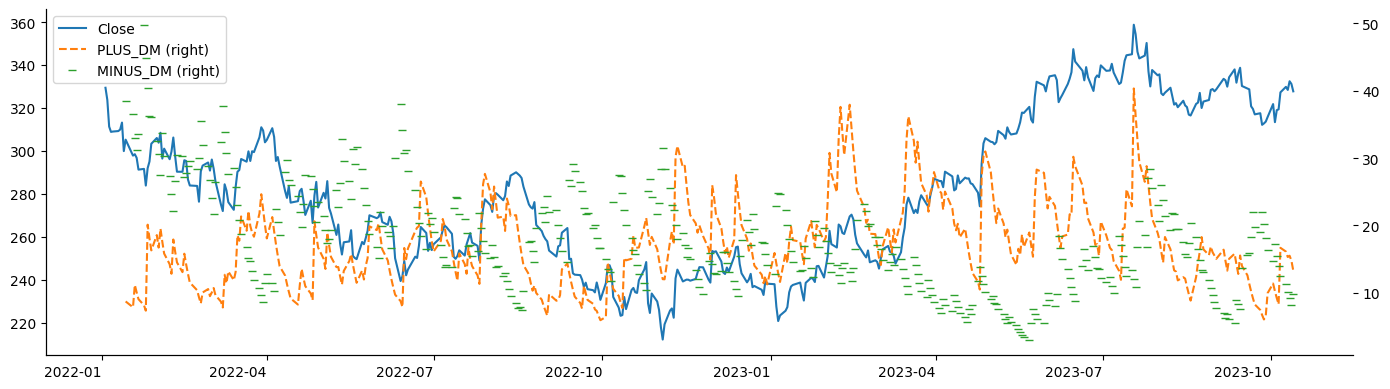

In [21]:
ax = pm[['Close', 'PLUS_DM', 'MINUS_DM']].plot(figsize=(14, 4),
                                               secondary_y=[
                                                   'PLUS_DM', 'MINUS_DM'],
                                               style=['-', '--', '_'],
                                              rot=0)
ax.set_xlabel('')
sns.despine()
plt.tight_layout()

Plus/Minus Directional Index (PLUS_DI/MINUS_DI)

In [22]:
pmi = msft.loc[:,['High', 'Low', 'Close']]

In [23]:
pmi['PLUS_DI'] = talib.PLUS_DI(pmi.High, pmi.Low, pmi.Close, timeperiod=14)
pmi['MINUS_DI'] = talib.MINUS_DI(pmi.High, pmi.Low, pmi.Close, timeperiod=14)

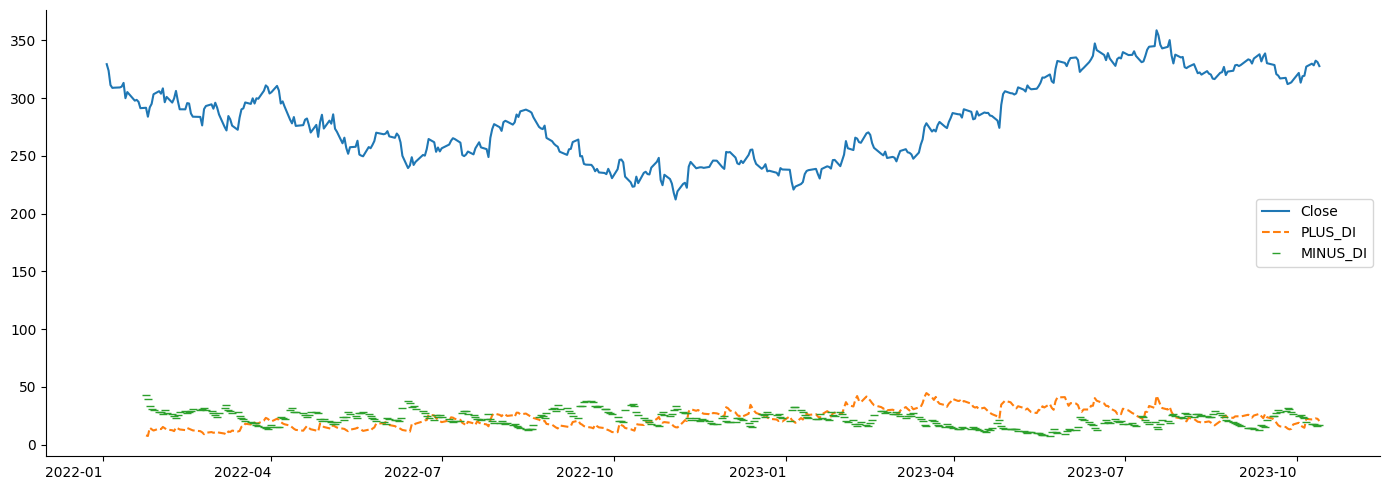

In [24]:
ax = pmi[['Close', 'PLUS_DI', 'MINUS_DI']].plot(figsize=(14, 5), style=['-', '--', '_'], rot=0)

ax.set_xlabel('')
sns.despine()
plt.tight_layout();

Average Directional Movement Index Rating

In [25]:
adm = msft.loc[:, ['High', 'Low', 'Close']]

In [26]:
adm['ADX'] = talib.ADX(adm.High, 
                      adm.Low, 
                      adm.Close, 
                      timeperiod=14)

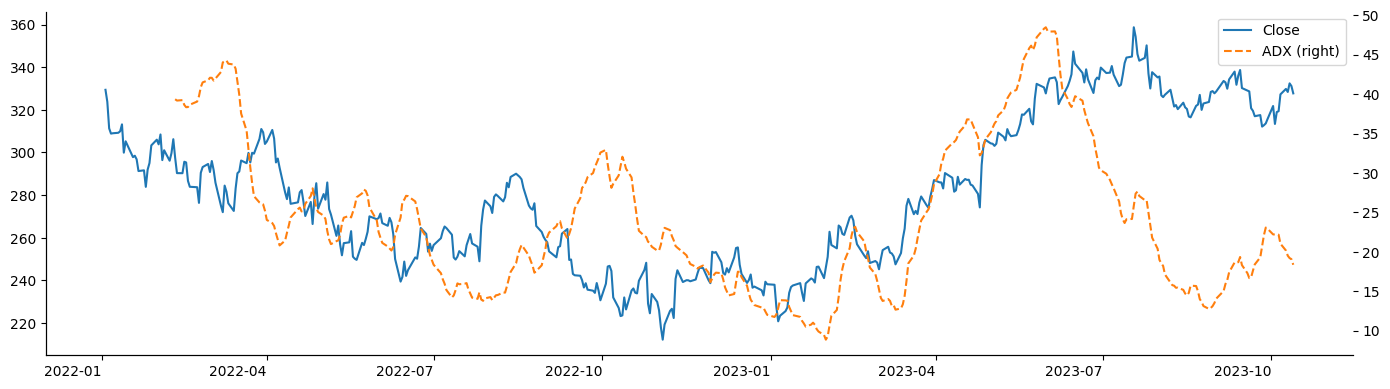

In [27]:
ax = adm[['Close', 'ADX']].plot(figsize=(14, 4), secondary_y='ADX', style=['-', '--'], rot=0)
ax.set_xlabel('')
sns.despine()
plt.tight_layout();

## Volume Indicators
### Chaikin A/D Line

In [28]:
cha = msft.loc[:,['High', 'Low', 'Close',  'Volume']]

In [29]:
cha['AD'] = talib.AD(cha.High,
                    cha.Low,
                    cha.Close,
                    cha.Volume)

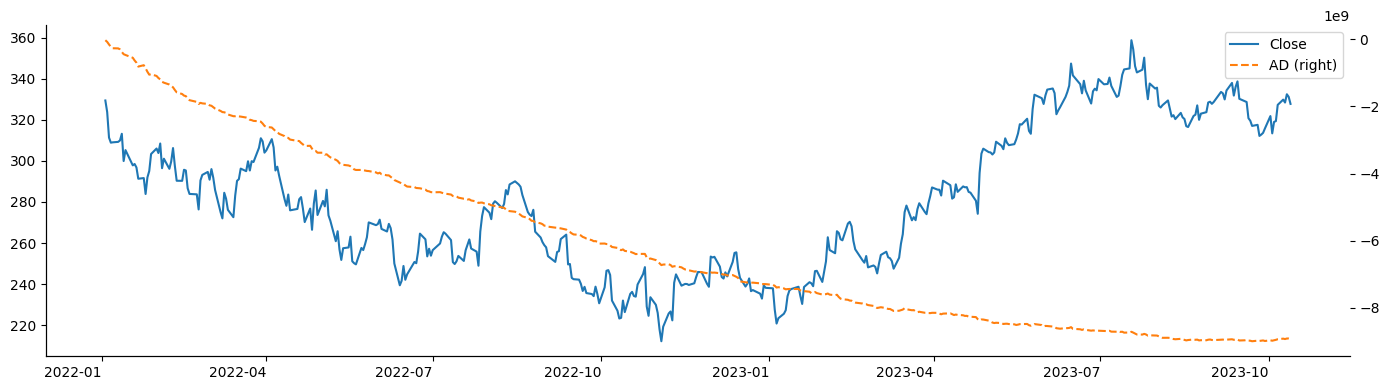

In [30]:
ax = cha[['Close', 'AD']].plot(figsize=(14, 4),
                              rot=0,
                              secondary_y='AD', style=['-', '--'])

ax.set_xlabel('')
sns.despine()
plt.tight_layout()

# Recoleccion de indicadores.


In [31]:
data_model[['SMA_5', 'SMA_21', 'SMA_63']] = sma[['SMA_5', 'SMA_21', 'SMA_63']]
data_model[['EMA_5', 'EMA_21', 'EMA_63']] = ema[['EMA_5', 'EMA_21', 'EMA_63']]
data_model[['WMA_5', 'WMA_21', 'WMA_63']] = wma[['WMA_5', 'WMA_21', 'WMA_63']]
data_model['middle'] = df['middle']
data_model['SAR'] = sar['SAR']
data_model[['PLUS_DM', 'MINUS_DM']] = pm[['PLUS_DM', 'MINUS_DM']]
data_model[['PLUS_DI', 'MINUS_DI']] = pmi[['PLUS_DI', 'MINUS_DI']]
data_model['ADX'] = adm['ADX']
data_model['AD'] = cha['AD']
data_model = data_model.dropna()

Guarda los resultados

In [32]:
data_model.to_parquet('resultadoIndicadores.parquet')

In [33]:
data_model

,SMA_5,SMA_21,SMA_63,EMA_5,EMA_21,EMA_63,WMA_5,WMA_21,WMA_63,middle,SAR,PLUS_DM,MINUS_DM,PLUS_DI,MINUS_DI,ADX,AD
Date,,,,,,,,,,,,,,,,,
2022-04-01,307.190033,292.083002,296.479928,305.146554,297.333649,296.479928,306.555017,298.026119,293.870684,297.588603,294.845623,18.053360,12.692497,19.989926,16.742386,24.045146,-2.613423e+09
2022-04-04,308.032111,293.262024,296.181155,306.955094,298.537152,296.920310,307.682397,299.706953,294.311067,298.825133,297.800238,21.228005,11.423248,22.366499,15.405302,23.644036,-2.629957e+09
2022-04-05,307.138757,294.763150,295.908021,306.816488,299.264618,297.220903,307.184786,300.913976,294.634758,299.559814,300.341206,19.105204,10.280923,21.445248,14.770775,23.271577,-2.683965e+09
2022-04-06,304.306866,295.873615,295.654043,302.983707,298.905847,297.161442,303.244582,300.964430,294.616325,299.155845,315.950012,17.194684,22.412834,19.651331,24.233406,22.355119,-2.734926e+09
2022-04-07,302.938251,296.477915,295.468380,301.043144,298.747317,297.161460,300.862966,301.081558,294.663449,298.965957,315.565212,15.475215,20.531536,18.315360,22.879658,21.549734,-2.759349e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-09,321.758002,323.436192,328.758887,323.934728,322.500290,324.428633,324.502002,320.742730,325.062400,322.383333,311.166722,16.100009,11.283183,21.728475,18.165396,20.165350,-8.915725e+09
2023-10-10,324.758002,322.981431,328.630354,325.419824,323.035720,324.552427,326.712673,321.193077,325.050873,322.955398,312.314718,15.290026,10.154865,21.787900,17.488907,19.506781,-8.927652e+09
2023-10-11,327.450006,323.012384,328.479306,327.753220,323.888837,324.798289,329.266677,322.051130,325.169299,323.856790,313.817541,15.481025,9.139378,22.626987,16.627633,19.205095,-8.911950e+09
